### Example 2

Lots of markup in the output, lets remove it ---

use BeautifulSoup and nltk modules and practice some regular expressions.

In [ ]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)

# Function to remove everything before the first "*** [any words] ***"
def remove_before_gutenberg_start(text):
    # Pattern to match everything before the first "*** ... ***" (start marker)
    pattern = r".*?\*\*\*.*?\*\*\*"

    # Replace the matched portion with an empty string
    result = re.sub(pattern, '', text, flags=re.DOTALL)

    return result

# Function to remove everything after the "*** END [any words] ***" marker
def remove_after_gutenberg_end(text):
    # Pattern to match everything after "*** END ... ***" (end marker)
    pattern = r"\*\*\* END.*?\*\*\*.*"

    # Replace the matched portion with an empty string
    result = re.sub(pattern, '', text, flags=re.DOTALL)

    return result

# Function that removes both the intro and ending based on the Gutenberg markers
def clean_gutenberg_text(text):
    # First, remove everything before the start marker
    text = remove_before_gutenberg_start(text)

    # Then, remove everything after the end marker
    text = remove_after_gutenberg_end(text)

    return text

# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)

    ## REMOVE THE FIRST AND LAST PART OF THE TEXT
    cleaned_text = clean_gutenberg_text(r.text)
    print(cleaned_text)
    #r.text = clean_gutenberg_text(r.text
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()

    # split string into an array of words using any sequence of spaces "\s+"
    wds = re .split('\s+',t)

    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])

    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)

    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)

    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w]


    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)

# Now populate two lists
#(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
#(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/76.txt.utf-8')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee))
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu))
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

#plotTwoLists (wf_ee, wf_bu, 'Difference between Pride and Prejudice and Huck Finn')

# Assignment 1

1. Compare word frequencies between two works of a single author.
1. Compare word frequencies between works of two authors.
1. Are there some words preferred by one author but used less frequently by another author?

Extra credit

1. The frequency of a specific word, e.g., "would" should follow a binomial distribution (each regular word in a document is a trial and with probability p that word is "would". The estimate for p is N("would")/N(regular word)). Do these binomial distributions for your chosen word differ significantly between books of the same author or between authors?

Project Gutenberg is a good source of for fiction and non-fiction.

E.g below are two most popular books from Project Gutenberg:
- Pride and Prejudice at http://www.gutenberg.org/ebooks/1342.txt.utf-8
- Adventures of Huckleberry Finn at http://www.gutenberg.org/ebooks/76.txt.utf-8

In [ ]:
# Apology by Plato https://www.gutenberg.org/cache/epub/1656/pg1656.txt
# Symposium by Plato https://www.gutenberg.org/cache/epub/1600/pg1600.txt
# Dialogues Concerning Natural Religion by David Hume https://www.gutenberg.org/cache/epub/4583/pg4583.txt

(wf_t1, tw_t1) = get_wf("https://www.gutenberg.org/cache/epub/1656/pg1656.txt")
(wf_t2, tw_t2) = get_wf("https://www.gutenberg.org/cache/epub/1600/pg1600.txt")
(wf_t3, tw_t3) = get_wf("http://www.gutenberg.org/ebooks/76.txt.utf-8")






    

Updated editions will replace the previous one—the old editions will
be renamed.

Creating the works from print editions not protected by U.S. copyright
law means that no one owns a United States copyright in these works,
so the Foundation (and you!) can copy and distribute it in the United
States without permission and without paying copyright
royalties. Special rules, set forth in the General Terms of Use part
of this license, apply to copying and distributing Project
Gutenberg™ electronic works to protect the PROJECT GUTENBERG™
concept and trademark. Project Gutenberg is a registered trademark,
and may not be used if you charge for an eBook, except by following
the terms of the trademark license, including paying royalties for use
of the Project Gutenberg trademark. If you do not charge anything for
copies of this eBook, complying with the trademark license is very
easy. You may use this eBook for nearly any purpose such as creation
of derivative works, reports, performance

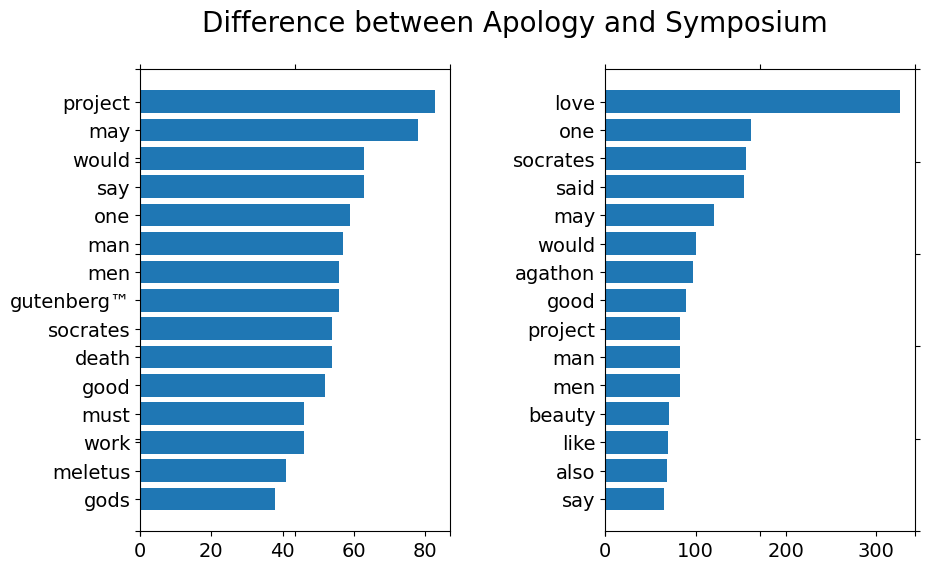

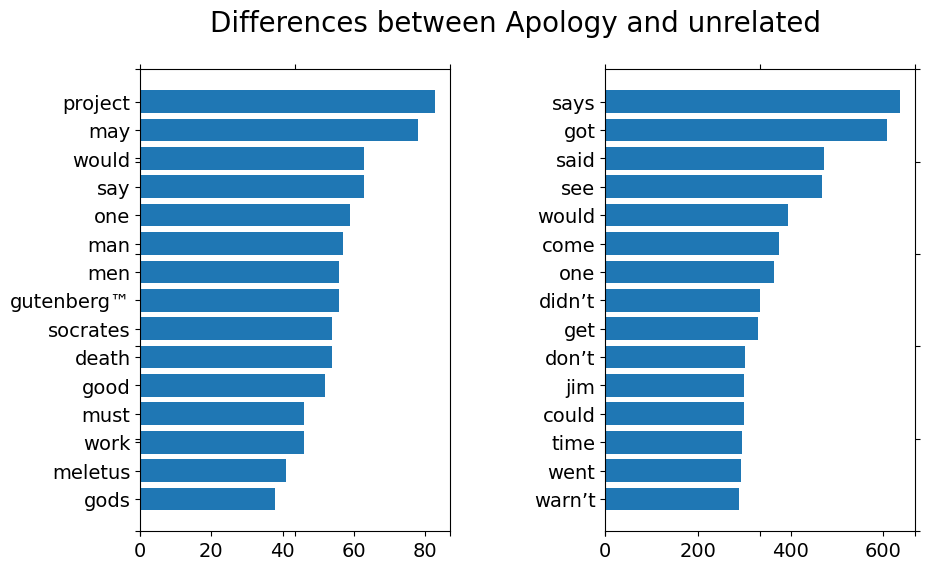

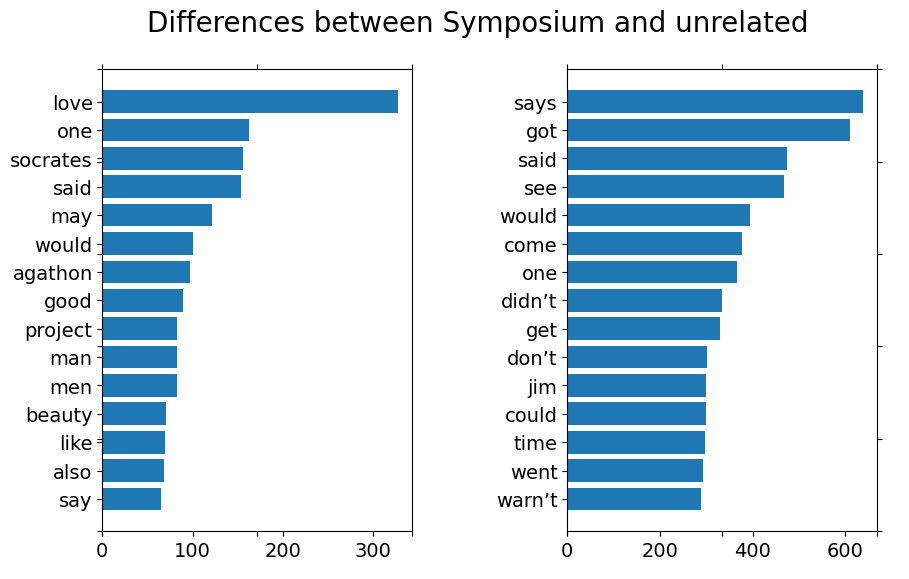

In [ ]:
plotTwoLists (wf_t1, wf_t2, 'Difference between Apology and Symposium')
plotTwoLists(wf_t1, wf_t3, 'Differences between Apology and unrelated')
plotTwoLists(wf_t2, wf_t3, 'Differences between Symposium and unrelated')


In [ ]:
print(tw_t1)

8307
